# Euler on 1d SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''=========
generate 1d bm path
========='''

def bm_1d_path(time_grid):
    step_size = np.diff(time_grid)
    dw = np.random.normal(0, np.sqrt(step_size)) #bm increment
    w = np.append([0], np.cumsum(dw)) #bm path
    return w

In [3]:
'''=========
sde param
=========='''

sde_1d_param = {
    'init_state': 1.,
    'drift': lambda x: 0.01*x, #drift function
    'vol': lambda x: 0.1*x #volatility function
}


In [4]:
'''==========
euler method on 1d sde
input:
    time grid
    sde_1d_param
==========='''

def euler_1d(grid, sde):
    #set SDE param
    x0 = sde['init_state']
    mu = sde['drift']
    sigma = sde['vol']
    
    #generate bm path
    w = bm_1d_path(grid)

    #initialize euler solution
    xh = x0 + np.zeros(grid.shape)
    #run euler
    for i in range(grid.size-1):
        dt = grid[i+1] - grid[i] #time step size
        dw = w[i+1] - w[i] #brownian increment
        xh[i+1] = xh[i] + mu(xh[i])*dt + sigma(xh[i])*dw #euler
        
    return xh
    

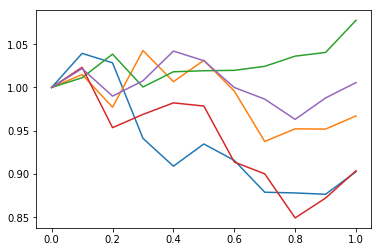

In [5]:
'''==========
test euler
=========='''

time_grid = np.linspace(0,1,11)

for i in range(5):
    xh = euler_1d(time_grid,sde_1d_param)
    plt.plot(time_grid, xh)